# From scratch implementation

## Linear Regression

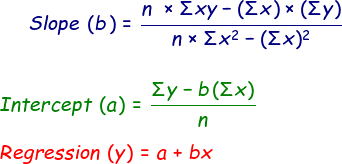

In [1]:
from IPython.display import Image
Image(filename='linear-regression-formula.png')

### Best Fit Slope

In [2]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,5,7,6,7], dtype=np.float64)

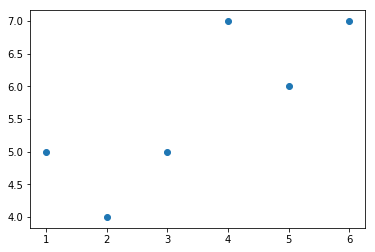

In [4]:
plt.scatter(xs,ys)
plt.show()

In [5]:
def best_fit_slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / 
        (mean(xs)**2 - mean(xs**2)))
    return m

In [6]:
m = best_fit_slope(xs, ys)

print(m)

0.5142857142857131


### Best fit line

In [7]:
def best_fit_slope(m, xs, ys):
    b = mean(ys) - m * mean(xs)
    return b

In [8]:
b = best_fit_slope(m, xs, ys)

print(b)

3.866666666666671


#### In one function

In [9]:
def best_fit_line_and_slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs*ys)) / 
        (mean(xs)**2 - mean(xs**2)))
    b = mean(ys) - m * mean(xs)
    return m, b

m, b = best_fit_line_and_slope(xs, ys)

print(m,b)

0.5142857142857131 3.866666666666671


In [10]:
regression_line = [(m*x)+b for x in xs]

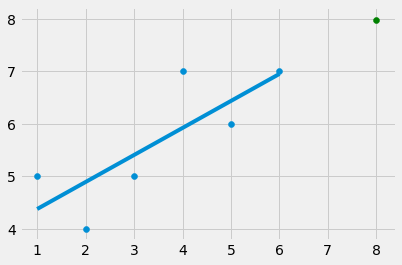

In [11]:
from matplotlib import style
style.use('fivethirtyeight')

predict_x = 8
predict_y = (m*predict_x)+b
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

In [12]:
predict_x = 8
predict_y = (m*predict_x)+b

## R Squared Error

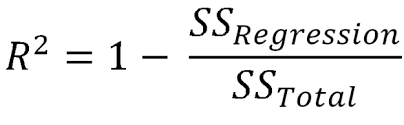

In [13]:
Image(filename='r_squared.png')

In [14]:
def squared_error(ys_original, ys_line):
    return sum((ys_line-ys_original)**2)

In [15]:
def coefficient_of_determination(ys_original, ys_line):
    y_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regr = squared_error(ys_original, ys_line)
    squared_error_y_mean = squared_error(ys_original, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

In [16]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.6311688311688312


##### So data is 1-0.63... accurate

In [17]:
print('Accuracy:', (1 - r_squared))

Accuracy: 0.36883116883116884


### Testing assumptions

In [18]:
import random

In [19]:
# hm - how much dataset
def create_dataset(hm, variance, step=2, corelation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if corelation and corelation == 'pos':
            val += step
        elif corelation and corelation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [20]:
xs, ys = create_dataset(40, 40, 2, corelation='pos')

0.5674739136047411


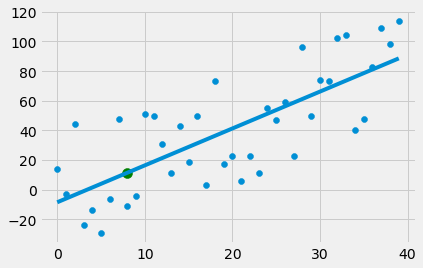

In [23]:
m, b = best_fit_line_and_slope(xs, ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)
predict_x = 8
predict_y = (m*predict_x)+b
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color='g')
plt.plot(xs, regression_line)
plt.show()